In [127]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [18]:
insurance=pd.read_csv('medical_cost_insurance.csv')

In [19]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
insurance.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
insurance.sample()

,age,sex,bmi,children,smoker,region,charges
967,44,male,25.365,1,no,northwest,7518.02535


In [24]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [60]:
insurance.replace(['male','female'],[0,1],inplace=True)
insurance.replace(['yes','no'],[0,1],inplace=True)
insurance.replace(['southeast','southwest','northwest','northeast'],[0,1,2,3],inplace=True)

In [61]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [62]:
insurance.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker     -1.464766
region      0.049225
charges     1.515880
dtype: float64

age            Axes(0.125,0.747241;0.133621x0.132759)
sex         Axes(0.285345,0.747241;0.133621x0.132759)
bmi          Axes(0.44569,0.747241;0.133621x0.132759)
children    Axes(0.606034,0.747241;0.133621x0.132759)
smoker      Axes(0.766379,0.747241;0.133621x0.132759)
region         Axes(0.125,0.587931;0.133621x0.132759)
charges     Axes(0.285345,0.587931;0.133621x0.132759)
dtype: object

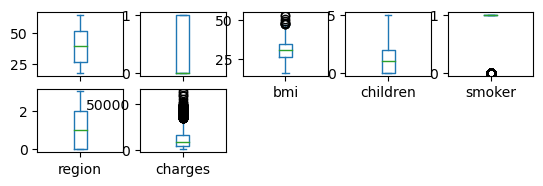

In [63]:
insurance.plot(kind='box',subplots=True,layout=(5,5))

In [64]:
z=np.abs(zscore(insurance))

In [65]:
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,0.402874,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,1.288007,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,1.288007,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.482258,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.482258,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.482258,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.367391,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,1.288007,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,0.402874,0.930362


In [66]:
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


<Axes: ylabel='Frequency'>

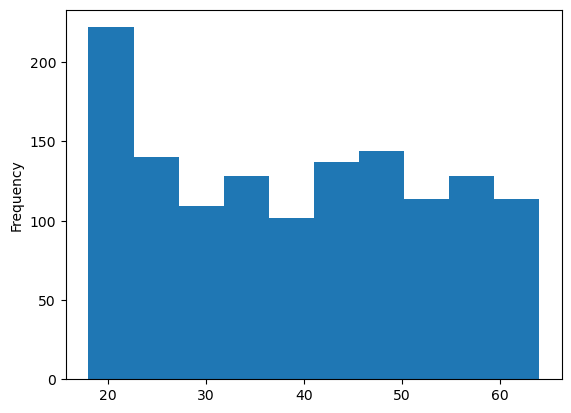

In [46]:
insurance['age'].plot.hist()

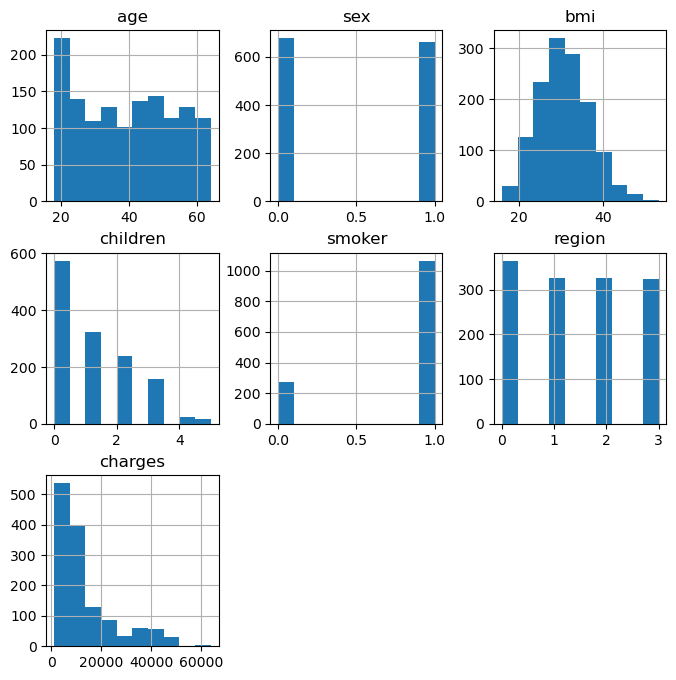

In [71]:
insurance.hist(figsize=(8,8),bins=10)
plt.show()

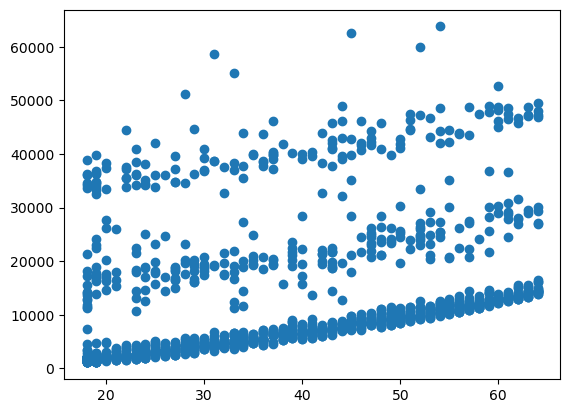

In [73]:
plt.scatter(insurance['age'],insurance['charges'])
plt.show()

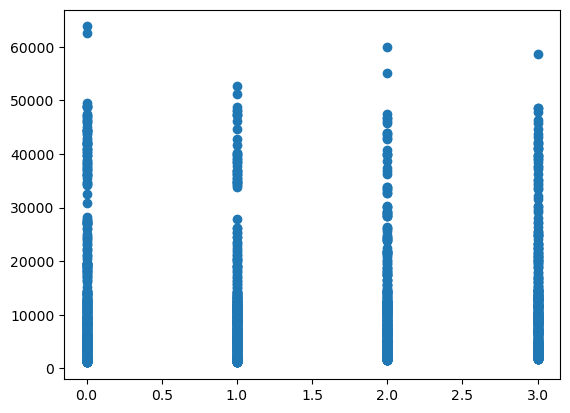

In [76]:
plt.scatter(insurance['region'],insurance['charges'])
plt.show()

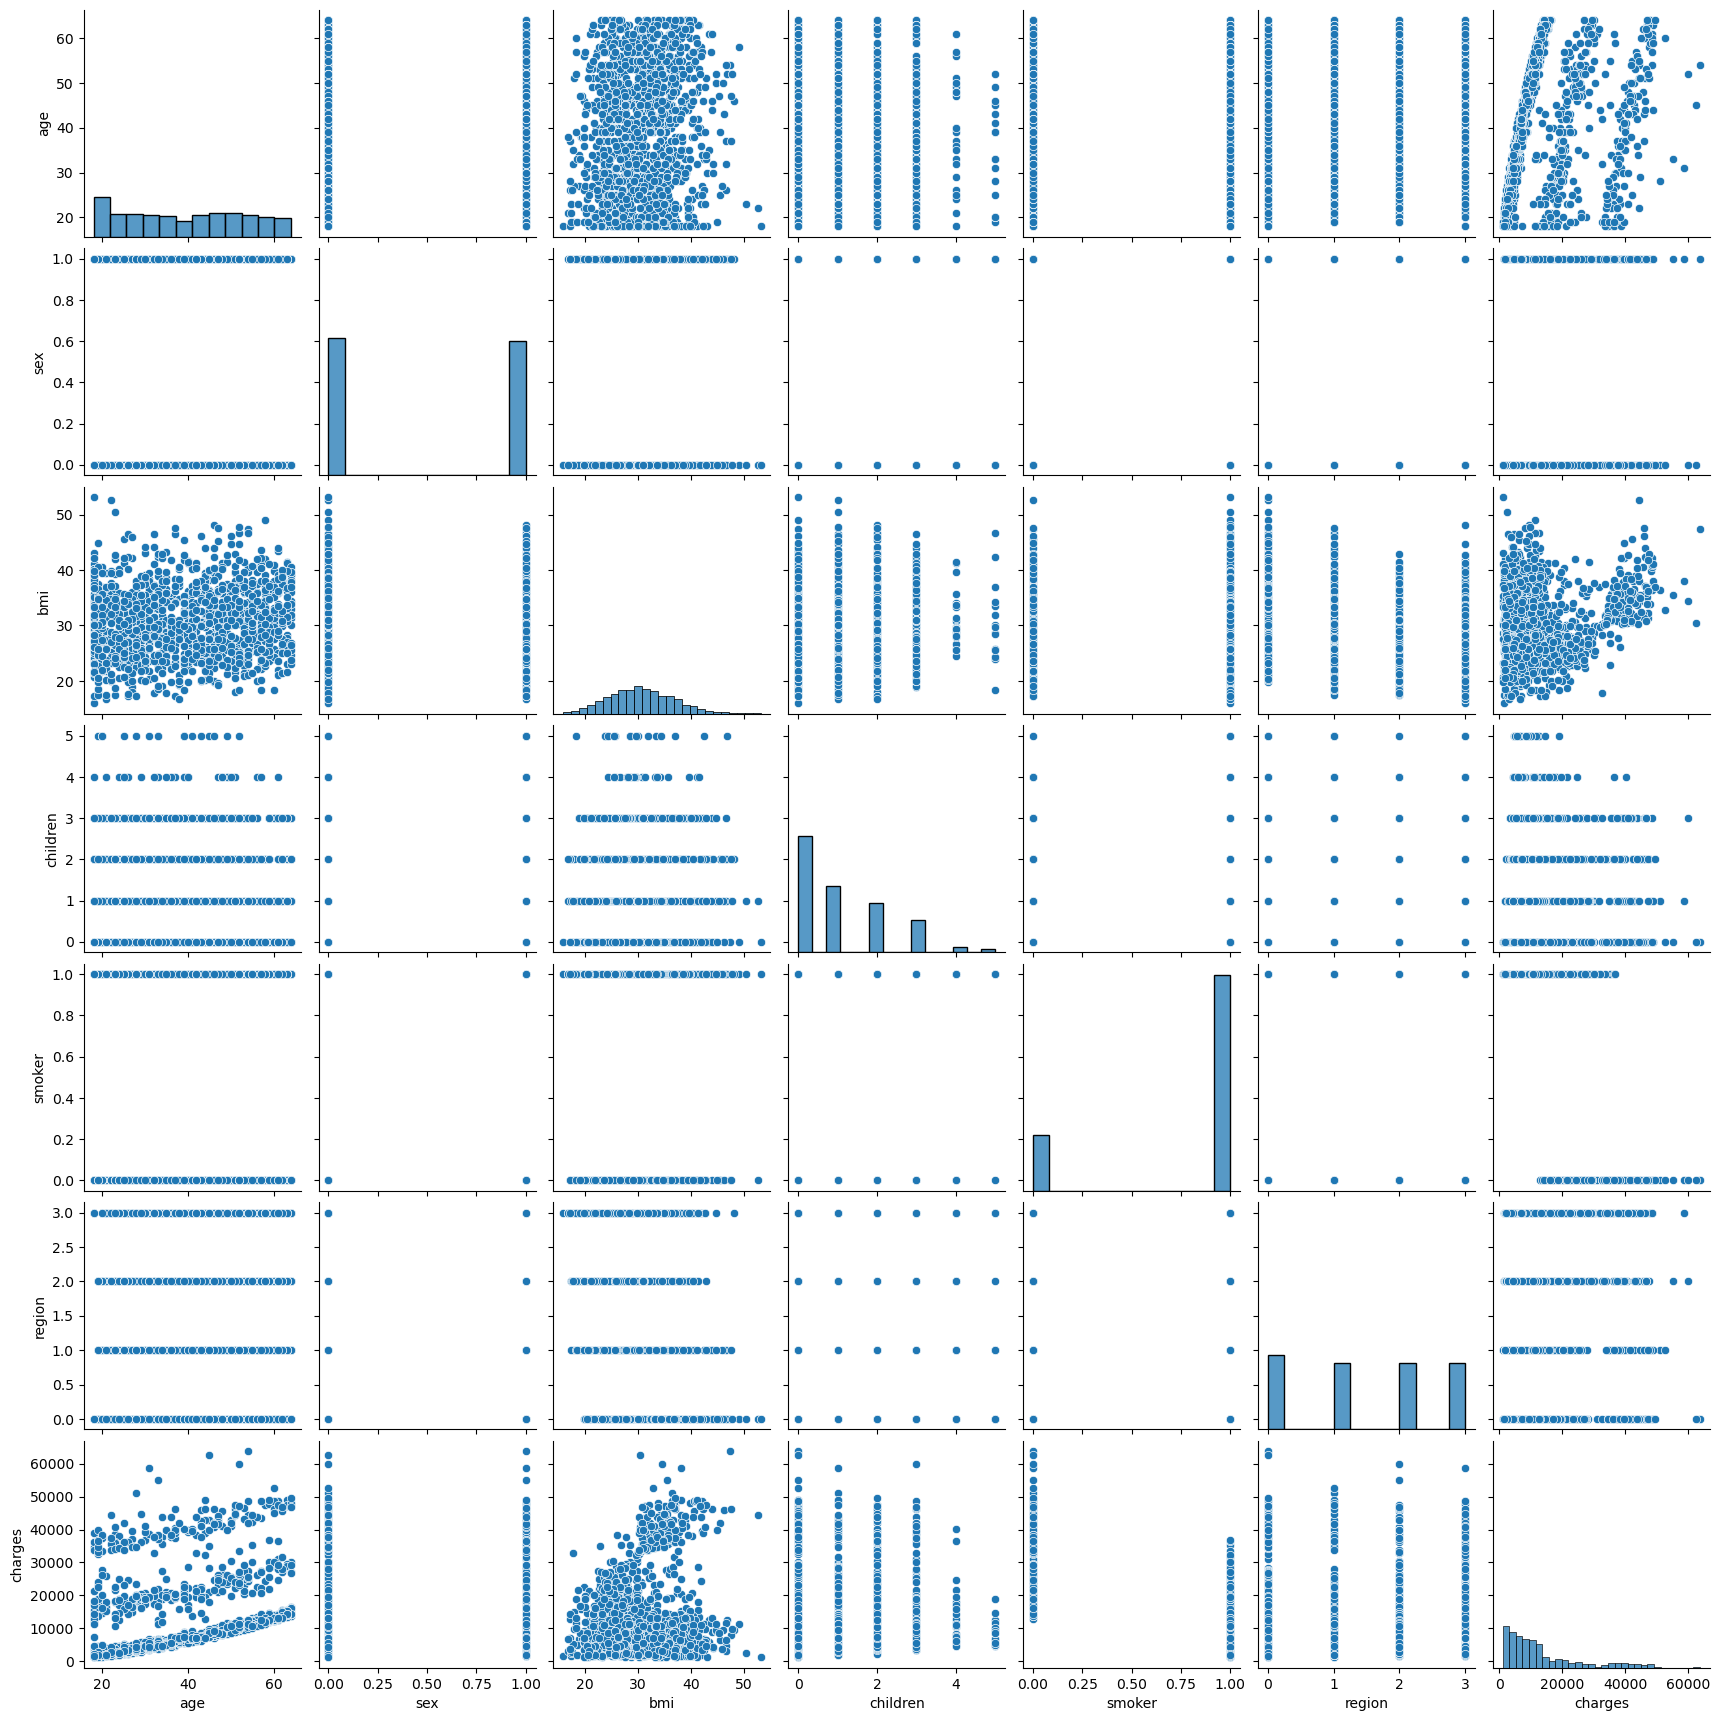

In [77]:
sns.pairplot(insurance)

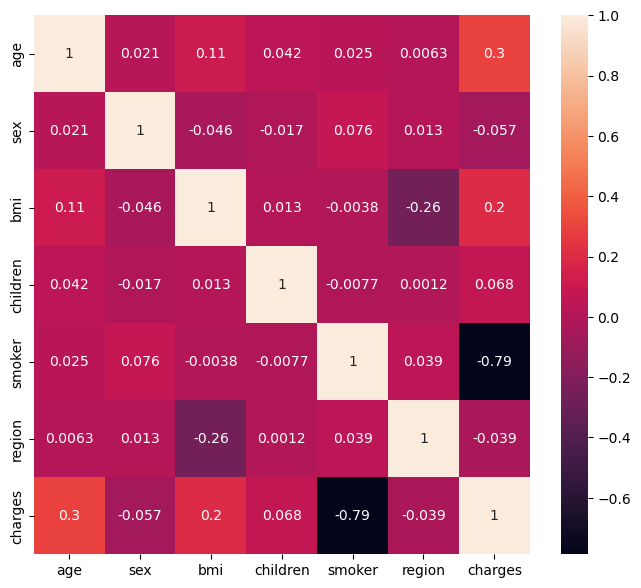

In [79]:
corr_hmap=insurance.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [81]:
insurance_new=insurance[(z<3).all(axis=1)]

In [82]:
insurance_new

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [85]:
insurance.shape

(1338, 7)

In [86]:
insurance_new.shape

(1309, 7)

In [87]:
insurance=insurance_new
insurance.shape

(1309, 7)

In [91]:
x=insurance.iloc[:,0:-1]
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2


In [92]:
y=insurance.iloc[:,-1]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [93]:
x.shape

(1309, 6)

In [94]:
y.shape

(1309,)

In [108]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [109]:
x_train.shape

(916, 6)

In [110]:
y_train.shape

(916,)

In [111]:
x_test.shape

(393, 6)

In [112]:
y_train.shape

(916,)

In [115]:
lm=LinearRegression()

In [116]:
lm.fit(x_train,y_train)

LinearRegression()

In [118]:
lm.coef_

array([ 2.51345714e+02,  1.75247023e+01,  3.19684246e+02,  5.08096792e+02,
       -2.30591177e+04,  3.55861754e+02])

In [121]:
lm.intercept_

10785.531041217419

In [122]:
lm.score(x_train,y_train)

0.7434276739272707

In [124]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result price:",pred)
print("actual price:",y_test)

Predicted result price: [15217.26475772 12022.63082267 27627.36476411   621.94602747
  9188.75011397 11607.72645415 10350.97084947 33906.30720963
 15553.56741208  7412.55311936  6528.84269904  7864.93042331
  2393.63950447 14642.49399352 11406.69486424 11751.75151203
 31265.02438724  5887.70746042 11506.23037109  9833.96012133
  9552.76391667 30840.70532383  9020.88634351 27677.20445818
  4889.03840251 11976.19013205  4467.18541863 31154.35510142
  3991.80317443  9213.65817756 17617.91620359  5879.32177306
 27773.55712745  2114.24305626  6347.37038495  6525.66995295
  5342.94899196 10453.44704692  9299.2269773   7025.94196249
 33090.02902737 12892.32493678  2325.82066208  8982.1149397
  2410.41087918 35970.52150991 28043.72297112  7965.71761217
  -524.69246021 16566.21314319  6712.53109189 15723.18686313
   813.3207755  12361.19177392  8599.21569062 12831.47300348
  6242.66736795  5501.09630355  9360.25561997 11392.10809096
 14867.86300344 12469.64498098 35486.08654478  5273.31932184
 

In [126]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 4124.8194837451265
Mean squared error: 32940613.543380845
Root mean squared error: 5739.39139137425


In [129]:
#change coming in y whenever x is being changed
print(r2_score(y_test,pred))

0.7731929984452197


In [140]:
#testing the data
i=np.array([61,1,29.070,0,0,2])
i.shape

(6,)

In [136]:
i=i.reshape(1,-1)
i.shape

(1, 6)

In [137]:
lm.predict(i)

array([36140.08882783])

In [138]:
df=pd.DataFrame(pred)

In [139]:
df

,0
0,15217.264758
1,12022.630823
2,27627.364764
3,621.946027
4,9188.750114
...,...
388,39342.537630
389,11720.513674
390,10317.845778
391,10130.775324
